In [1]:
#read the dataset/import the file
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  re
import nltk
from gensim.models import Word2Vec
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from keras.models import load_model # saving model for later use 

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import pandas as pd
xl = pd.ExcelFile("final_datasets2.xlsx")
df = xl.parse( header=None, names=['ID','Level','Date','Label','Msg'], encoding='utf-8')
df

,ID,Level,Date,Label,Msg
0,450812019270046,1,20/1/2021,1,Durbi garee kanaa hundishee akka waan durbumma...
1,451178209233427,1,20/1/2021,1,Durbif gaararraan waanuma argitetti bifasheef ...
2,451092299242018,1,20/1/2021,1,Durbummaa namni qabu hundi gagamaa dha. Adduny...
3,450937722590809,1,20/1/2021,0,Durbi safuu beektu keessa kooti
4,451408632543718,1,20/1/2021,1,Durbummaa mataan haxxifannaan Hiikatu na jibbi...
...,...,...,...,...,...
12807,874138889673855_874148553006222,2,26/4/2021,0,CAALAA keenya dhugumaan caalaadha ati
12808,874138889673855_874148726339538,2,26/4/2021,0,Dhugaan karaatti hin haftu caaliyyee jabaadh...
12809,874138889673855_874152466339164,2,26/4/2021,0,Nuuf buli wan gumaachitu hin dhabin sanyii
12810,874138889673855_874152919672452,2,26/4/2021,0,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘


In [3]:
df.isnull().sum()

ID       0
Level    0
Date     0
Label    0
Msg      0
dtype: int64

In [4]:
##to know the number of each class data
df['Label'].value_counts()

1    6636
0    6176
Name: Label, dtype: int64

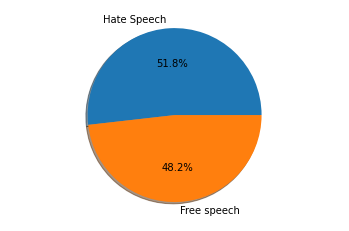

In [5]:
#data set Illustration by pie chart 
exp_vals = [  6636, 6176]
exp_labels = ["Hate Speech ","Free speech "]
plt.axis("equal")
plt.pie(exp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%',radius=1)
plt.show()

In [6]:
df

,ID,Level,Date,Label,Msg
0,450812019270046,1,20/1/2021,1,Durbi garee kanaa hundishee akka waan durbumma...
1,451178209233427,1,20/1/2021,1,Durbif gaararraan waanuma argitetti bifasheef ...
2,451092299242018,1,20/1/2021,1,Durbummaa namni qabu hundi gagamaa dha. Adduny...
3,450937722590809,1,20/1/2021,0,Durbi safuu beektu keessa kooti
4,451408632543718,1,20/1/2021,1,Durbummaa mataan haxxifannaan Hiikatu na jibbi...
...,...,...,...,...,...
12807,874138889673855_874148553006222,2,26/4/2021,0,CAALAA keenya dhugumaan caalaadha ati
12808,874138889673855_874148726339538,2,26/4/2021,0,Dhugaan karaatti hin haftu caaliyyee jabaadh...
12809,874138889673855_874152466339164,2,26/4/2021,0,Nuuf buli wan gumaachitu hin dhabin sanyii
12810,874138889673855_874152919672452,2,26/4/2021,0,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘


In [7]:
df.groupby('Label').describe()

Level                                             
        count      mean       std  min  25%  50%  75%  max
Label                                                     
0      6176.0  1.442358  0.496706  1.0  1.0  1.0  2.0  2.0
1      6636.0  1.478903  0.499592  1.0  1.0  1.0  2.0  2.0

In [8]:
df.drop(['ID','Level','Date'],axis='columns',inplace=True)
df

,Label,Msg
0,1,Durbi garee kanaa hundishee akka waan durbumma...
1,1,Durbif gaararraan waanuma argitetti bifasheef ...
2,1,Durbummaa namni qabu hundi gagamaa dha. Adduny...
3,0,Durbi safuu beektu keessa kooti
4,1,Durbummaa mataan haxxifannaan Hiikatu na jibbi...
...,...,...
12807,0,CAALAA keenya dhugumaan caalaadha ati
12808,0,Dhugaan karaatti hin haftu caaliyyee jabaadh...
12809,0,Nuuf buli wan gumaachitu hin dhabin sanyii
12810,0,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘


In [9]:
df['Label1']=df['Label']
df

,Label,Msg,Label1
0,1,Durbi garee kanaa hundishee akka waan durbumma...,1
1,1,Durbif gaararraan waanuma argitetti bifasheef ...,1
2,1,Durbummaa namni qabu hundi gagamaa dha. Adduny...,1
3,0,Durbi safuu beektu keessa kooti,0
4,1,Durbummaa mataan haxxifannaan Hiikatu na jibbi...,1
...,...,...,...
12807,0,CAALAA keenya dhugumaan caalaadha ati,0
12808,0,Dhugaan karaatti hin haftu caaliyyee jabaadh...,0
12809,0,Nuuf buli wan gumaachitu hin dhabin sanyii,0
12810,0,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,0


In [10]:
df.drop(['Label'],axis='columns',inplace=True)
df

,Msg,Label1
0,Durbi garee kanaa hundishee akka waan durbumma...,1
1,Durbif gaararraan waanuma argitetti bifasheef ...,1
2,Durbummaa namni qabu hundi gagamaa dha. Adduny...,1
3,Durbi safuu beektu keessa kooti,0
4,Durbummaa mataan haxxifannaan Hiikatu na jibbi...,1
...,...,...
12807,CAALAA keenya dhugumaan caalaadha ati,0
12808,Dhugaan karaatti hin haftu caaliyyee jabaadh...,0
12809,Nuuf buli wan gumaachitu hin dhabin sanyii,0
12810,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,0


# 1. Data Pre-processing 

In [11]:
# WORD COUNT:
df['word_count'] = df['Msg'].apply(lambda x : len(str(x).split()))
df.head(450)

,Msg,Label1,word_count
0,Durbi garee kanaa hundishee akka waan durbumma...,1,11
1,Durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,Durbummaa namni qabu hundi gagamaa dha. Adduny...,1,16
3,Durbi safuu beektu keessa kooti,0,5
4,Durbummaa mataan haxxifannaan Hiikatu na jibbi...,1,6
...,...,...,...
445,Shamarri durbummaa hin qabne farda luugama hin...,1,8
446,Jecha obboleettii keetin hin jenne obboloota b...,0,9
447,Durbuma Funyaan ishee hamma mokoronii ishee xi...,1,11
448,Shamarri dhaqna hin qabanne mi'a yookiin qodaa...,1,8


In [12]:
# Convert to Lower Case : 
df['Msg'] = df['Msg'].apply(lambda x : x.lower())
df['Msg'].head(2)
df

,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,0,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6
...,...,...,...
12807,caalaa keenya dhugumaan caalaadha ati,0,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadh...,0,8
12809,nuuf buli wan gumaachitu hin dhabin sanyii,0,7
12810,leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,0,7


In [13]:
#Removing any date format 
df["Msg"].replace(
    {'\d+[\/:\-]\d+[\/:\-\s]*[\dAaPpMm]*' : '', '\w+\s\d+[\,]\s\d+' : ''},
    regex=True,
    inplace=True,
    )


In [14]:
# Contaction to Expansion > can't TO can not ,you'll TO you will
contractions = { 
"fkn": "fakkeenya",
"ykn": "yookaan ",
"lakk.": "lakkoofsa",
"hub.": "hubachiisa",
"fbc": "faanaa broodkaastingi korporeet ",
"obn": "oromiyaa broodkaastingi neetwoork ",
"omn": "oromiyaa miidiyaa neetwoork ",
"fb": "feesbuukii",
"qar.": "qarshii",
"bill.": "billiyoona ",
"a.l.a": "akka lakkoofsa awurooppaa",
"a.l.i": "Akka Lakkoofsa Itoophiyaa",
"kkf": "kan kana fakkaatan",
"kkf.": "kan kana fakkaatan",    
"m/b": "mana barumsaa",
"prof.": "pirofeesara",
"dr.": "dooctar",
"dn.": "daaqon",
"i/g": "itti gaafatamaa",
"ob.": "obbo",
"obb.": "obbo",
"m/murtii": "mana Murtii",
"hosp.": "hospitaala",
"mm.": "muumee Ministeeraa",
"dh.k.d": "dhaloota kiristoosin duura",
"dh.k.b": " dhaloota kiristoosin booda",
"h/bulaa": "hoorsisee Bulaa",
"q/bulaa": "qoonaan bulaa",
"A.B.O": "adda Bilisa baasa uummata oromoo ",
"pmns": "prezdaantii mootummaa naannoo somaalee",
"pmno": "prezdaantii mootummaa naannoo oromiyaa",  
"pmna": "prezdaantii mootummaa naannoo amaaraa",   
"pmng": "prezdaantii mootummaa naannoo gambeellaa", 
"pmnbg": "prezdaantii mootummaa naannoo benishaangul gumuuz",
"a.s.w": "assalaamu'aleykum warahmatullahi wabarakaatuhu",
"asw": "assalaamu'aleykum warahmatullahi wabarakaatuhu",    
"jzk": "jazakallah ",
"s.w.a": "sallallaahu aleeyhi wasallam ",    
"alh": "allah",
"b.b.o": "biiroo barnoota oromiyaa",
"k.b.r": " kolleejjii barsiisota roobee ",
"k.b.a": " kolleejjii barsiisota asallaa ",    
"k.b.j": " kolleejjii barsiisota jimmaa ",   
"k.b.y": " kolleejjii barsiisota yaa'aballoo ",  
"k.b.s": " kolleejjii barsiisota sabbataa ",       
"db.f.o": "dhaabbata fayyaa oromiyaa ",
"m.n.o": "mootummaa naannoo oromiyaa",
"mno": "mootummaa naannoo oromiyaa",    
"r.i.b": "raayyaa ittisa biyyaa",
"a.b.u.t": "adda bilisa baasa uummata tigraayi ",
"t.p.l.f": "adda bilisa baasa uummata tigraayi ",    
"kk": "kkk",
"kkk" :"kkk",
"kkkk":"kkk",
"kkkkk":"kkk",
"kkkkkk":"kkk",
"kkkkkkk":"kkk",
"hh":"hhh" ,
"hhh":"hhh",
"hhhh":"hhh",
"hhhhh":"hhh",
"hhhhhh":"hhh",
"hhhhhhh":"hhh",
"wow":"wow",
"woow":"wow",
"wooow":"wow",
"woooow":"wow",
"wooooow":"wow",
"woooooow":"wow",
"www":"wow",
"wwhoo":"wow",
"ohh":"ooh",
"oohh":"ooh",
"oohhh":"ooh",
"ohh":"ooh",
"oohh":"ooh",
"ooohhh":"ooh",
"akkka":"akka",    
"uuf":"uuf",
"uuuf":"uuf",
"uuuuf":"uuf",
"uuuuuf":"uuf",
"uuuuuuf":"uuf",
"uuff":"uuf",
"uuff":"uuf",
"uufff":"uuf",
"uuffff":"uuf",
"uufffff":"uuf",
"uuffffff":"uuf ",
"uffee":"uffee",
"uffeee":"uffee",
"ufee":"uffee",
"ufeeee":"uffee",
"baay'ee": "baayyee",
"ja'a": "jaha ",
"keecha" : "keessa",
"har'a": "harra ",
"ajaa'iba":" ajaayiba ",
"qeeyroo":"qeerroo ",
"bal'aa": "ballaa ",
"qal'oo" : "qalloo",
"keeysa":"keessa",
"worra": "warra",
"mul'ta":"Mullata" ,
"xoophiyaa":"itoophiyaa",
"yuunibaristii":"yuunivarsiitii" ,
"wonti" :" wanti",
"umrii" :" umurii",
"waa'ee" :"waayee",
"re'ee" :"rehee",
"dhalaa": "dubara",
"keeysan" :" keessan",
"qur'aana" :" quraana",
"sheeyxana" :" seexana",
"ba'e":"bahe",
"wahii":"wayii",
"macaafa":"kitaaba",
"dhagahuu":"dhaga'uu",
"dhageeysa":"dhageecha" ,
"rabbi":"waaqa",
"beetti":"beekti",
"fuundura" :" fuuldura",
"keeysa" :"  keessa",
"olkaa'uu": "olkaawuu",
"obboleeysa": "obbolessa",
"wal'aalaa":"wallaalaa" ,  
"wal'aalaan":"wallaalaan"   
}
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
df['Msg'] = df['Msg'].apply(lambda x : cont_to_exp(x))

In [15]:
df

,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,0,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6
...,...,...,...
12807,caalaa keenya dhugumaan caalaadha ati,0,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadh...,0,8
12809,nuuf buli wan gumaachitu hin dhabin sanyii,0,7
12810,leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,0,7


In [16]:
# remove Institutional Email
df['Msg'] = df['Msg'].apply(lambda i : re.sub(r'([A-Za-z0-9+_]+\.[A-Za-z0-9+_]+@[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+)','', i))


In [17]:
# Remove normal email
df['Msg'] = df['Msg'].apply(lambda i : re.sub(r'([A-Za-z0-9+_]+@[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+)','', i))

In [18]:
df


,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,0,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6
...,...,...,...
12807,caalaa keenya dhugumaan caalaadha ati,0,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadh...,0,8
12809,nuuf buli wan gumaachitu hin dhabin sanyii,0,7
12810,leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,0,7


In [19]:
# Remove URL
df['Msg'] = df['Msg'].apply(lambda i : re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+','', i))
df.head()

,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,0,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6


In [20]:
# Remove more than one white space 
df['Msg'] = df['Msg'].apply(lambda d : " ".join(d.split()))


In [21]:
# Remove HTML tags 
from bs4 import BeautifulSoup
df['Msg'] = df['Msg'].apply(lambda x : BeautifulSoup(x, 'lxml').get_text())


In [22]:
# Removing special charcter and Puncutation marks & number 
spec_chars = ["!","-",'"',"#","%","&","(",")", 
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
            "`","{","|","}","~","–"]
for char in spec_chars:
    df['Msg'] = df['Msg'].str.replace(char, ' ')

In [23]:
# Replacing ’ with apostrophe(') this is not work pls find and replace from excell 
spec_chars3 = ["’"]
for chars in spec_chars3:
    df['Msg'] = df['Msg'].str.replace(chars, " ' ")

In [24]:
# remove Stop word 
read=open("stopword.txt",encoding='latin',mode='r')
readfirst=read.read()
def remove_stop_word(x):
    filtered_words = [word for word in x.split() if word not in readfirst]
    return " ".join(filtered_words)
df['Msg'] = df['Msg'].apply(lambda x : remove_stop_word(x))
df


,Msg,Label1,word_count
0,durbi garee hundishee durbummaa qabduu dhiira ...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1,16
3,durbi safuu beektu kooti,0,5
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1,6
...,...,...,...
12807,caalaa dhugumaan caalaadha,0,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,0,8
12809,buli wan gumaachitu hin dhabin sanyii,0,7
12810,leenca dhugaa keeti jajjabee ❤️💚❤️💘💘💘💘,0,7


In [25]:
df

,Msg,Label1,word_count
0,durbi garee hundishee durbummaa qabduu dhiira ...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1,16
3,durbi safuu beektu kooti,0,5
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1,6
...,...,...,...
12807,caalaa dhugumaan caalaadha,0,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,0,8
12809,buli wan gumaachitu hin dhabin sanyii,0,7
12810,leenca dhugaa keeti jajjabee ❤️💚❤️💘💘💘💘,0,7


In [26]:
# Removing Emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['Msg'] = df['Msg'].apply(lambda x :  remove_emoji(x))
df

,Msg,Label1,word_count
0,durbi garee hundishee durbummaa qabduu dhiira ...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1,16
3,durbi safuu beektu kooti,0,5
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1,6
...,...,...,...
12807,caalaa dhugumaan caalaadha,0,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,0,8
12809,buli wan gumaachitu hin dhabin sanyii,0,7
12810,leenca dhugaa keeti jajjabee,0,7


In [27]:
df.drop(['word_count'],axis='columns',inplace=True)
df

,Msg,Label1
0,durbi garee hundishee durbummaa qabduu dhiira ...,1
1,durbif gaararraan waanuma argitetti bifasheef ...,1
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1
3,durbi safuu beektu kooti,0
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1
...,...,...
12807,caalaa dhugumaan caalaadha,0
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,0
12809,buli wan gumaachitu hin dhabin sanyii,0
12810,leenca dhugaa keeti jajjabee,0


In [28]:
cleaneddf=df
cleaneddf

,Msg,Label1
0,durbi garee hundishee durbummaa qabduu dhiira ...,1
1,durbif gaararraan waanuma argitetti bifasheef ...,1
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1
3,durbi safuu beektu kooti,0
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1
...,...,...
12807,caalaa dhugumaan caalaadha,0
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,0
12809,buli wan gumaachitu hin dhabin sanyii,0
12810,leenca dhugaa keeti jajjabee,0


In [29]:
df['Msg'] = df['Msg'].str.replace('\d+', '')
df['Msg'].str.findall('\w{2,}').str.join(' ')

0        durbi garee hundishee durbummaa qabduu dhiira ...
1        durbif gaararraan waanuma argitetti bifasheef ...
2        durbummaa namni qabu hundi gagamaa addunyaan m...
3                                 durbi safuu beektu kooti
4        durbummaa mataan haxxifannaan hiikatu jibbisiisam
                               ...                        
12807                           caalaa dhugumaan caalaadha
12808    dhugaan karaatti hin haftu caaliyyee jabaadhu ...
12809                buli wan gumaachitu hin dhabin sanyii
12810                         leenca dhugaa keeti jajjabee
12811                               jiraadhu leenca keenya
Name: Msg, Length: 12812, dtype: object

In [30]:
X_train, X_test, y_train, y_test = train_test_split(cleaneddf.Msg,df.Label1,test_size=0.2, random_state=10)

In [31]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print('total '+ str(len(X_train)+len(X_test)))

10249
2563
10249
2563
total 12812


# 2.Text Vectorization/ Feature Extraction 

## 2.1 BOW Vectorization 

In [32]:
# word unigram gram vectorization 
from sklearn.feature_extraction.text import CountVectorizer
vec1 = CountVectorizer(min_df=1,ngram_range=(1,1),analyzer='word')
X_train_count1 = vec1.fit_transform(X_train.values)
X_train_count1.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
print( 'Vocabulary size ' +str(len(vec1.vocabulary_)))

Vocabulary size 17614


In [34]:
vec1.get_feature_names()

['aa',
 'aaadaa',
 'aabb',
 'aabba',
 'aabbee',
 'aabbootti',
 'aabshir',
 'aachuu',
 'aada',
 'aadaa',
 'aadaaf',
 'aadaafi',
 'aadaan',
 'aadaasaa',
 'aadafi',
 'aadam',
 'aadde',
 'aaddee',
 'aadha',
 'aadhaan',
 'aadii',
 'aadmale',
 'aaf',
 'aafi',
 'aafii',
 'aafrikaa',
 'aagaa',
 'aakiratillee',
 'aaktariin',
 'aalbeen',
 'aalee',
 'aalem',
 'aalfaa',
 'aalfaadhas',
 'aam',
 'aama',
 'aame',
 'aamiiin',
 'aamiin',
 'aammiin',
 'aan',
 'aana',
 'aanaa',
 'aanaaa',
 'aanaaichaa',
 'aanaalee',
 'aanaan',
 'aanga',
 'aangeessuun',
 'aangoo',
 'aangoof',
 'aangoon',
 'aangoorra',
 'aangoorraa',
 'aangooti',
 'aangootti',
 'aangotti',
 'aanichaa',
 'aanii',
 'aannaan',
 'aannaanii',
 'aannan',
 'aannanii',
 'aanni',
 'aannis',
 'aanolee',
 'aanoleef',
 'aanoleeti',
 'aansa',
 'aansaan',
 'aansee',
 'aansitee',
 'aansuun',
 'aantummaa',
 'aantummaan',
 'aantuu',
 'aantuun',
 'aanuf',
 'aanutti',
 'aanuuf',
 'aara',
 'aarfatiin',
 'aarii',
 'aariin',
 'aarraa',
 'aarsa',
 'aarsaa',
 'aa

# 2.2 TF-IDF Vectorization `

In [35]:
#  tfidf vectorization ways 1 by ngram 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvec1=TfidfVectorizer(min_df=1,ngram_range=(1,1),analyzer='word')
X_train_tfidf1=tfidfvec1.fit_transform(X_train.values)
X_train_tfidf1.toarray()[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 3. Machine learnig algorithm 

# 3.1 MultinomialNB Algorithm 

In [36]:
# Naive Bayes Algorithm 1 by ngram 
from sklearn.naive_bayes import MultinomialNB
nbmodel1 = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
nbmodel1.fit(X_train_count1,y_train)

MultinomialNB()

In [37]:
# Naive Bayes Algorithm 1 by TF-IDF with unigram 
from sklearn.naive_bayes import MultinomialNB
nbmodel2 = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
nbmodel2.fit(X_train_tfidf1,y_train)

MultinomialNB()

# 4. Prediction

# 4.1 Prediction by NB

In [38]:
# Prediction by first model 
post_or_comment  = [
    'durbi diimtuun cimtuudha  ',
    'shammarran  wallaggaa Fokkistuudha',
    'Oromoon Beekadha ',
    'Oromoon sirna Gadaan Bula ' ,
    'biyya koo nin jibba',
    'Uummanni Amaaraa diina uummata Oromooti',
    'Tiruump nama gowwadha',
    'Uummanni Gurraachi sammuun isaanii hin yaadu',
    'Mootumman wayyaanee Qabeenya biyyaa saame',
    'Beqee haadha keeti icci'
    
]
m1 = vec1.transform(post_or_comment)
nbmodel1.predict(m1)

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [39]:
# Prediction by fourth model 
post_or_comment  = [
    'durbi diimtuun cimtuudha  ',
    'shammarran  wallaggaa Fokkistuudha',
    'Oromoon Beekadha ',
    'Oromoon sirna Gadaan Bula ' ,
    'biyya koo nin jibba',
    'Uummanni Amaaraa diina uummata Oromooti',
    'Tiruump nama gowwadha',
    'Uummanni Gurraachi sammuun isaanii hin yaadu'
    'Mootumman wayyaanee Qabeenya biyyaa saame',
    'Beqee haadha keeti icci'
    
]
m4 = tfidfvec1.transform(post_or_comment)
nbmodel2.predict(m4)

array([1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

# 5.1 Accuracy by NB 

In [40]:
#NB model1 
X_test_count1 = vec1.transform(X_test)
nbmodel1.score(X_test_count1, y_test)

0.8685134607881388

In [41]:
#NB model4
X_test_count2 = tfidfvec1.transform(X_test)
nbmodel2.score(X_test_count2, y_test)

0.870854467420991

In [42]:
# Accuracy by first model 
from sklearn.metrics import classification_report
predictions1=nbmodel1.predict(X_test_count1)
print (classification_report(y_test, predictions1))


              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1229
           1       0.84      0.93      0.88      1334

    accuracy                           0.87      2563
   macro avg       0.87      0.87      0.87      2563
weighted avg       0.87      0.87      0.87      2563



In [43]:
# Accuracy by first model 
from sklearn.metrics import classification_report
predictions1=nbmodel2.predict(X_test_count2)
print (classification_report(y_test, predictions1))


              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1229
           1       0.84      0.92      0.88      1334

    accuracy                           0.87      2563
   macro avg       0.88      0.87      0.87      2563
weighted avg       0.87      0.87      0.87      2563



# Confusion Matrix

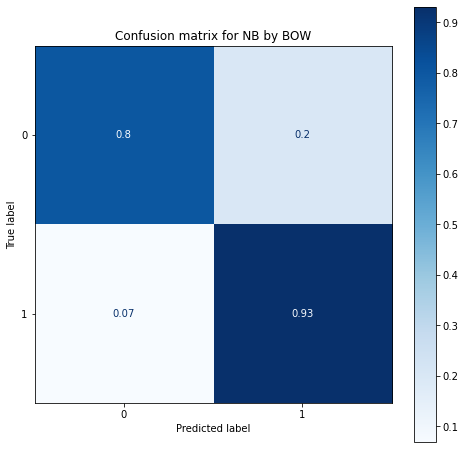

In [44]:
# Generate confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 8))
matrix = plot_confusion_matrix(nbmodel1, X_test_count1, y_test,
                                 cmap=plt.cm.Blues,
                                 ax=ax,
                                normalize='true')
plt.title('Confusion matrix for NB by BOW')
plt.show(matrix)
plt.show()


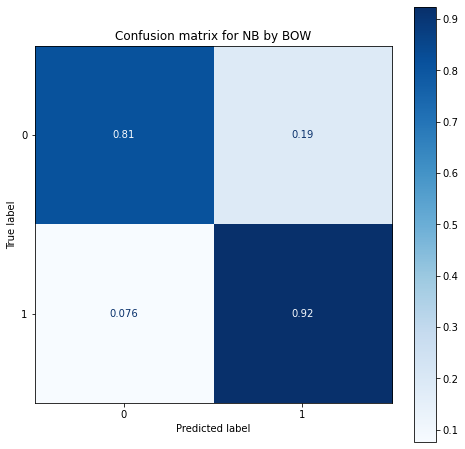

In [45]:
# Generate confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 8))
matrix = plot_confusion_matrix(nbmodel2, X_test_count2, y_test,
                                 cmap=plt.cm.Blues,
                                 ax=ax,
                                normalize='true')
plt.title('Confusion matrix for NB by BOW')
plt.show(matrix)
plt.show()


# Saving model for later use 

In [46]:
import pickle 
with open('model folder/nbmodel12','wb') as f:
    pickle.dump(nbmodel1,f)


In [47]:
import pickle 
with open('model folder/nbmodel22','wb') as f:
    pickle.dump(nbmodel2,f)
